### Data Preprocessing

#### Load Dataset

There are two fields in this dataset:

- text: the description of disease  review text.
- label: The disease category .



In [3]:
# import required libraries
import pandas as pd
import numpy as np
import seaborn as sns



from sklearn.metrics import f1_score, accuracy_score, confusion_matrix
# f1 score
from sklearn.model_selection import train_test_split

# read the disease description
df = pd.read_csv('combined.csv')
# pandas variable

df.head()



,Description,Category,Unnamed: 2
0,I've been dealing with this huge pain in my ri...,heart disease,NaN
1,"Hello, doctor. I've been experiencing a persis...",heart disease,NaN
2,"Doctor, I've been experiencing some concerning...",heart disease,NaN
3,"Hey, doctor, I've been experiencing progressiv...",heart disease,NaN
4,"Hi, doctor, I've been feeling this pain on my ...",heart disease,NaN


In [4]:
df.info()
df = df[['Description','Category']]

print(df.head())
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3202 entries, 0 to 3201
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Description  3202 non-null   object
 1   Category     3202 non-null   object
 2   Unnamed: 2   3 non-null      object
dtypes: object(3)
memory usage: 75.2+ KB
                                         Description       Category
0  I've been dealing with this huge pain in my ri...  heart disease
1  Hello, doctor. I've been experiencing a persis...  heart disease
2  Doctor, I've been experiencing some concerning...  heart disease
3  Hey, doctor, I've been experiencing progressiv...  heart disease
4  Hi, doctor, I've been feeling this pain on my ...  heart disease
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3202 entries, 0 to 3201
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Description  3202 non-null   object
 1   Catego

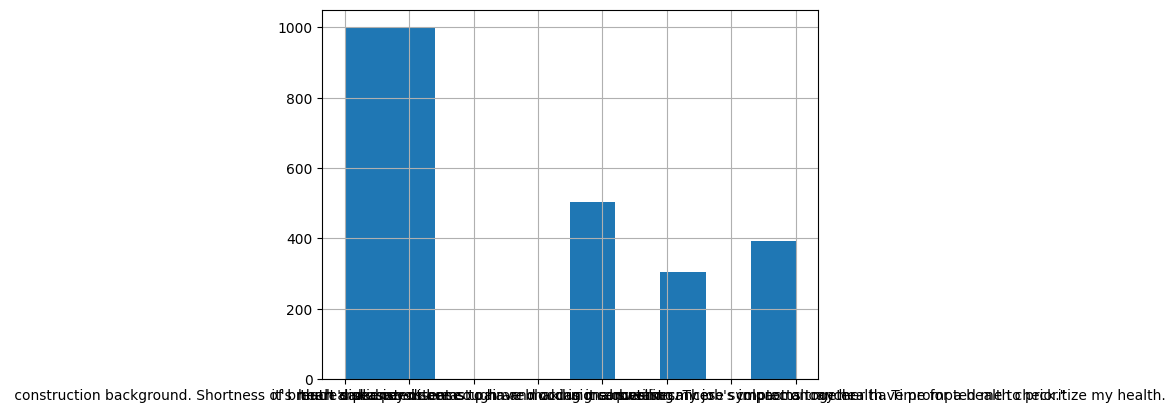

In [5]:
df.head()


df['Category'].hist()

for i in range(len(df['Category'])):
    if(df['Category'][i] == "lung cancer"):
        continue



Map classes to the integers

The first line defines a dictionary target_map that maps the original categorical target variable 'sentiment' to a numerical representation, with 'positive' mapped to 1, 'negative' mapped to 0 and ‘neutral’ mapped to 2.

In [6]:
'''
import os
from datasets import load_dataset


raw_datasets = load_dataset('csv', data_files='./corpus.csv')


os.environ['CUDA_VISIBLE_DEVICES'] = "3"
imdb = load_dataset("imdb")
imdb["test"][0]
'''

#python dictionary
target_map = {"lung cancer" : 0,  "kidney disease": 1  ,  "heart disease" : 2 , "breast cancer" : 3 ,"colorectal cancer" :  4 }

df['target'] = df['Category'].map(target_map)

#print(df['target'][0])

df1 = df[['Description','target']]
df1.columns = ['text','label']


df2 = df1.fillna(0)

print(df2.head())

df1['label'] = df2.label.astype(int)



df1.to_csv('data.csv', index = False)


print(df1.head())




#print("All sentence is:\n",df1.sentence.str.len())
print("Longest length is:\n",df1.text.str.len().max())



                                                text  label
0  I've been dealing with this huge pain in my ri...    2.0
1  Hello, doctor. I've been experiencing a persis...    2.0
2  Doctor, I've been experiencing some concerning...    2.0
3  Hey, doctor, I've been experiencing progressiv...    2.0
4  Hi, doctor, I've been feeling this pain on my ...    2.0
                                                text  label
0  I've been dealing with this huge pain in my ri...      2
1  Hello, doctor. I've been experiencing a persis...      2
2  Doctor, I've been experiencing some concerning...      2
3  Hey, doctor, I've been experiencing progressiv...      2
4  Hi, doctor, I've been feeling this pain on my ...      2
Longest length is:
 2302


<ipython-input-6-c278313165f2>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['label'] = df2.label.astype(int)


#### Tokenization

In [5]:
!pip install datasets
!pip install git+https://github.com/huggingface/transformers # Get the newest transformers , not colab default version

# bash script

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.8/547.8 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.9/39.9 MB 16.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 16.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 22.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 19.1 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.31.0
    Uninstalling requests-2.31.0:
      Successfully uninstalled requests-2.31.0
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 14.0.2
    Uninstalling pyarrow-14.0.2:
      Successfully uninstalled pyarrow-14.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 2

In [7]:
'''
def preprocess_function(examples):
    return tokenizer(examples["text"], truncation=True)

tokenized_imdb = imdb.map(preprocess_function, batched=True)
'''

# make datasets
from datasets import load_dataset


raw_dataset = load_dataset('csv', data_files = 'data.csv')

print(raw_dataset)

print(raw_dataset['train'][0])




Generating train split: 0 examples [00:00, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 3202
    })
})
{'text': "I've been dealing with this huge pain in my right upper quadrant for the past two months, and it's been getting worse. It's this dull ache, and it really bothers me. Even touching the area feels tender. But that's not all. I've noticed that I have bad appetite and my body weight drop significantly recently, and I always feel so tired. Over the past week, my legs have been swelling up, especially around the ankles. I can't exercise like I used to, and even simple things like taking a shower or brushing my teeth leave me short of breath and exhausted. It's weird; I've had to prop myself up to sleep the last couple of nights because I couldn't breathe well lying down. I've had heart failure, high cholesterol and high blood pressure since my early 40s. I've also suffered from diabetes, which has been under control. I've been on disability for a while now, and I'm covered by Me

In [2]:
for i in range(0 ,3000, 150) :
    print(raw_dataset['train'][i])

{'text': "I've been dealing with this huge pain in my right upper quadrant for the past two months, and it's been getting worse. It's this dull ache, and it really bothers me. Even touching the area feels tender. But that's not all. I've noticed that I have bad appetite and my body weight drop significantly recently, and I always feel so tired. Over the past week, my legs have been swelling up, especially around the ankles. I can't exercise like I used to, and even simple things like taking a shower or brushing my teeth leave me short of breath and exhausted. It's weird; I've had to prop myself up to sleep the last couple of nights because I couldn't breathe well lying down. I've had heart failure, high cholesterol and high blood pressure since my early 40s. I've also suffered from diabetes, which has been under control. I've been on disability for a while now, and I'm covered by Medicaid. I've had gotten two doses of Pfizer COVID vaccine. I don’t know whether they are this the reason.

In [8]:
split = raw_dataset['train'].train_test_split(test_size=0.3, seed=42)

print(split)

print(split['train'][2])

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 2241
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 961
    })
})
{'text': "Over the recent fortnight, I've been ensconced in episodes typified by bradycardic manifestations, concomitant with discernible asthenia and prostration. These incidents seem to transpire capriciously, irrespective of periods of repose or engagement in trifling activities. Episodically, I've also experienced episodes of syncopal predisposition and cognitive attenuation. Given the protraction and accentuation of these symptoms, I am inclined to confer with you to deliberate upon potential causative factors and formulate cogent remedial strategies.", 'label': 2}


In [11]:
from transformers import AutoTokenizer
# transformers


tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")

# distill Bert


max_length = 2302


# tokenize
def tokenize_fn(batch):
  return tokenizer(batch['text'] , truncation = True )
  #return tokenizer(batch['sentence'], truncation = True, padding = True , return_tensors="pt")

#print(split)

tokenized_dataset = split.map(tokenize_fn, batched = True)


print(tokenized_dataset['train'][132])




Map:   0%|          | 0/2241 [00:00<?, ? examples/s]

Map:   0%|          | 0/961 [00:00<?, ? examples/s]

{'text': "I've been having episodes of rapid heartbeat that coincide with a feeling of tightness and discomfort in my chest. These occurrences tend to happen unexpectedly and can last for varying durations. Alongside the palpitations, I've experienced moments of light-headedness and a persistent sense of unease. Recognizing the potential seriousness of these symptoms, I decided it's important to consult with you to determine the underlying cause and discuss appropriate measures to address the issue.", 'label': 2, 'input_ids': [101, 1045, 1005, 2310, 2042, 2383, 4178, 1997, 5915, 12251, 2008, 19680, 2007, 1037, 3110, 1997, 4389, 2791, 1998, 17964, 1999, 2026, 3108, 1012, 2122, 27247, 7166, 2000, 4148, 14153, 1998, 2064, 2197, 2005, 9671, 9367, 2015, 1012, 4077, 1996, 14412, 23270, 10708, 1010, 1045, 1005, 2310, 5281, 5312, 1997, 2422, 1011, 3753, 2791, 1998, 1037, 14516, 3168, 1997, 27880, 1012, 14622, 1996, 4022, 27994, 1997, 2122, 8030, 1010, 1045, 2787, 2009, 1005, 1055, 2590, 2000, 

Split the Dataset to test and train
- test-size = 0.3
- seed = 42

In [12]:

tokenized_dataset


DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 2241
    })
    test: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 961
    })
})

In [13]:
for i in range(0,20):
    print(tokenized_dataset['train'][i])


{'text': "Turning 50, I'm a man, a construction worker with a personal history of digestive issues. Noticing blood in the stool and ongoing abdominal pain has prompted me to consider potential causes.", 'label': 4, 'input_ids': [101, 3810, 2753, 1010, 1045, 1005, 1049, 1037, 2158, 1010, 1037, 2810, 7309, 2007, 1037, 3167, 2381, 1997, 17886, 3512, 3314, 1012, 15103, 2668, 1999, 1996, 14708, 1998, 7552, 21419, 3255, 2038, 9469, 2033, 2000, 5136, 4022, 5320, 1012, 102], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}
{'text': "Always tired, and this cough just won't go away. Used to work in a dusty environment. I'm a 38-year-old woman.", 'label': 0, 'input_ids': [101, 2467, 5458, 1010, 1998, 2023, 19340, 2074, 2180, 1005, 1056, 2175, 2185, 1012, 2109, 2000, 2147, 1999, 1037, 12727, 4044, 1012, 1045, 1005, 1049, 1037, 4229, 1011, 2095, 1011, 2214, 2450, 1012, 102], 'attention_mask': [1, 1, 1, 1, 1, 

In [14]:
from transformers import DataCollatorWithPadding

data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

print(data_collator)

DataCollatorWithPadding(tokenizer=DistilBertTokenizerFast(name_or_path='distilbert-base-uncased', vocab_size=30522, model_max_length=512, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'unk_token': '[UNK]', 'sep_token': '[SEP]', 'pad_token': '[PAD]', 'cls_token': '[CLS]', 'mask_token': '[MASK]'}, clean_up_tokenization_spaces=True),  added_tokens_decoder={
	0: AddedToken("[PAD]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	100: AddedToken("[UNK]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	101: AddedToken("[CLS]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	102: AddedToken("[SEP]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	103: AddedToken("[MASK]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
}, padding=True, max_length=None, pad_to_multiple_of=None, return_tensors='pt')


Define tokenizer function



In [6]:
!pip install evaluate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 2.5 MB/s eta 0:00:00


### Evaluation Metric

In [15]:
import evaluate
import numpy as np

accuracy = evaluate.load("accuracy")

def compute_metrics(eval_pred):
    predictions, labels = eval_pred
    predictions = np.argmax(predictions, axis=1)
    return accuracy.compute(predictions=predictions, references=labels)

### Training

In [16]:
import torch
# pytorch
torch.cuda.is_available()

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

print(device)

#Additional Info when using cuda
if device.type == 'cuda':
    print(torch.cuda.get_device_name(0))

cuda:0
Tesla T4


In [2]:
import torch

torch.cuda.device_count()
torch.cuda.current_device()



0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 314.1/314.1 kB 5.0 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-m

In [16]:
from transformers import AutoModelForSequenceClassification, TrainingArguments, Trainer

'''
id2label = {0: "NEGATIVE", 1: "POSITIVE"}
label2id = {"NEGATIVE": 0, "POSITIVE": 1}
'''


id2label = {0 : "lung cancer", 1: "kidney disease" , 2: "heart disease" , 3 : "breast cancer" ,  4 : "colorectal cancer" }
label2id = {"lung cancer" : 0,  "kidney disease": 1  ,  "heart disease" : 2 , "breast cancer" :3 ,"colorectal cancer" : 4}
#label2id = {"lung cancer" : 0.0,  "kidney disease": 1.0  , "heart disease" : 2.0}
#id2label = {0 : "lung cancer", 1: "kidney disease" , 2: "heart disease" }

model = AutoModelForSequenceClassification.from_pretrained(
    "distilbert-base-uncased", num_labels= 5 , id2label=id2label, label2id=label2id
)


training_args = TrainingArguments(
    output_dir="cached_model",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs= 100,
    weight_decay=0.01,
    evaluation_strategy="epoch",
    save_strategy="epoch",
    load_best_model_at_end=True,
    push_to_hub=False,
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_dataset["train"],
    eval_dataset=tokenized_dataset["test"],
    tokenizer=tokenizer,
    data_collator=data_collator,
    compute_metrics=compute_metrics,
)

trainer.train()


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1525: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


Epoch,Training Loss,Validation Loss,Accuracy
1,No log,0.112773,0.969823
2,No log,0.046540,0.990635
3,No log,0.039579,0.986472
4,0.183800,0.044976,0.991675
5,0.183800,0.050287,0.990635
6,0.183800,0.061064,0.985432
7,0.183800,0.035396,0.993757
8,0.008000,0.030399,0.993757
9,0.008000,0.050207,0.991675
10,0.008000,0.047485,0.991675


KeyboardInterrupt: 

### Inference

In [ ]:
from transformers import pipeline

classifier = pipeline("sentiment-analysis", model="stevhliu/my_awesome_model")
classifier(text)

config.json:   0%|          | 0.00/538 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/360 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

NameError: name 'text' is not defined

In [ ]:
from transformers import pipeline, AutoModel, AutoTokenizer ,AutoModelForSequenceClassification, TrainingArguments, Trainer

# Replace with your custom model of choice
model = AutoModelForSequenceClassification.from_pretrained(
    './cached_model/checkpoint-14100'
)
tokenizer = AutoTokenizer.from_pretrained('./cached_model/checkpoint-14100')

pipe = pipeline(
    task="text-classification",  # replace with whatever task you have
    model=model,
    tokenizer=tokenizer
)

In [ ]:
text = "I've been having episodes of rapid and irregular heartbeat, with a palpable sense of fluttering. It's a bit unsettling, and I'm not sure what might be causing these cardiac irregularities."
pipe(text)

[{'label': 'heart disease', 'score': 0.9999998807907104}]

In [ ]:
text = 'I\'ve been feeling palpitations lately'
pipe(text)

[{'label': 'heart disease', 'score': 0.9999995231628418}]